# Cvičení 6

Tématem tohoto cvičení je iterační řešení soustav lineárních rovnic.

## Richardsonova metoda

Základní tvar Richardsonovy iterační metody je 
$$\mathbf{x}^{k+1} = \mathbf{x}^k + \omega\mathbf{r}^k,$$
kde $\omega>0$ a $\mathbf{r}^k = \mathbf{b}-\mathsf{A}\mathbf{x}^k$ je reziduum. 

Volbou hodnoty $\omega$ jsme schopni ovlivnit rychlost konvergence metody. Optimální hodnota je 
$$\omega = \frac{2}{\lambda_{\mathrm{min}}+\lambda_{\mathrm{max}}}$$

Metoda konverguje pro $\omega\in(0, 2/\lambda_{\mathrm{max}})$.

Doplňte správné řešení Richardsonovy metody do buňky níže. Vyjít můžete např. z následujícího pseudokódu:


$$
\begin{array}{l}
\text{Input: SPD matrix } A, \text{ right-hand side vector } b, \text{ initial approximation } x_0, \text{ tolerance tol, maximum number of iterations max\_it.}\\
\text{Calculate the initial residual norm } r_0 = ||b-A*x_0||\\
\text{Calculate the optimal value } \omega \\
\text{\bf{while} } \text{r/r0 > tol and k < max\_it \bf{do}}\\
\quad\begin{array}{l}
    \text{Calculate solution vector } x^{k+1} = x^k + \omega \ r^k\\
    \text{Calculate the residual norm: } r^{k+1} = ||b-A*x^{k+1}||\\
    \text{Increment the iteration counter: } k = k + 1\\
\end{array}\\
\text{end while}\\
\text{The solution is stored in } x^{k+1}\\
\end{array}
$$

**Tip**: Budete potřebovat funkci `eigh` z NumPy, která slouží k určení vlastních čísel reálné symetrické matice.

In [1]:
import numpy as np
from numpy.linalg import eigh

In [22]:
def richardson(A, b, x0, tol, max_it, omega=None):

    r0 = np.linalg.norm(b - A@x0)
    x = x0.copy()
    r = b - A.dot(x)
    
    if omega is None:
        eigenvalues, eigenvectors = np.linalg.eigh(A)
        lambda_min = eigenvalues[0]
        lambda_max = eigenvalues[-1]

        omega = 2/(lambda_min + lambda_max)
        
        # ÚKOL: Doplnte vypocet optimalni hodnoty omega:

    k = 0
    
    while np.linalg.norm(r) / r0 > tol and k < max_it:
        # ÚKOL: Doplnte vypocet x
        x = x + omega*r
        # ÚKOL: Doplnte vypocet r
        r = (b - A@x)
        k += 1

    return x, k

In [64]:
A = np.random.rand(5, 5)
A = 0.5*(A + A.T)           # zajistí symetrii
A = A + 5 * np.eye(5)       # zajistí diagonální dominanci
b = np.random.rand(5, 1)
x0 = np.zeros((5, 1))

x, k = richardson(A, b, x0, 0.0001, 100)
print("Počet iterací:", k)
# Ověření správnosti řešení
print("Moje x:\n", x)
# x se musí rovnat analytickému řešení
print("Analytické řešení:\n", np.linalg.solve(A, b))

# Porovnání chyby řešení
if np.allclose(x, np.linalg.solve(A, b), atol=1e-4):
    print("Řešení je správné!")
else:
    print("Řešení není správné.")

Počet iterací: 7
Moje x:
 [[ 0.00696119]
 [ 0.02251281]
 [-0.00296572]
 [ 0.10579689]
 [ 0.01021925]]
Analytické řešení:
 [[ 0.00695988]
 [ 0.0225107 ]
 [-0.00296797]
 [ 0.10579748]
 [ 0.01021834]]
Řešení je správné!


Nakonec otestujeme, jak počet iterací Richardsonovy metody závisí na parametru `omega`. Následující kód tedy:
1. Vygeneruje symetrickou pozitivně definitní matici rozměru $10\times 10$,
2. určí její nejmenší a největší vlastní číslo,
3. podle těchto vlastních čísel určí maximální možnou velikost parametru `omega` zajišťující konvergenci,
4. určí optimální `omega`,
5. řeší soustavu postupně pro různá omega mezi 0 a `omega_max` voláním vámi implementované metody,
6. vykreslí do grafu potřebný počet iterací v závislosti na `omega`

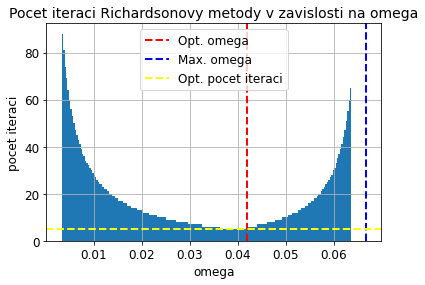

In [24]:
import matplotlib.pyplot as plt

# vygenerujeme matici, vektor prave strany
m = 10
A = np.random.rand(m, m)
A = A + A.T
max_row_sum = np.linalg.norm(A, np.inf)
A = A + 2*m * np.eye(m) 
b = np.random.rand(m, 1)

# vypocitame optimalni omega, max. omega
lambda_min = np.linalg.eigh(A)[0][0]
lambda_max = np.linalg.eigh(A)[0][-1]
omega_max = 2 / lambda_max
omega_opt = 2 / (lambda_min + lambda_max)
rho_opt = 1 - omega_opt * lambda_min

# vytvorime pole hodnot mezi 0 a omega_max
omegas = np.linspace(omega_max * 0.05, omega_max * 0.95, 200)

epsilon = 1e-3
max_it = 200
k_opt = np.log(epsilon) / np.log(rho_opt) # odhad potrebneho poctu iteraci pri omega_opt

# pocatecni odhad reseni
x0 = np.random.rand(m, 1)

# pole, do ktereho ukladame pocty iteraci v zavislosti na omega
n_iters = np.zeros(len(omegas))

# vyresime postupne ve smycce pro ruzna omega
for i in range(len(omegas)):
    _, n_iters[i] = richardson(A, b, x0, epsilon, max_it, omegas[i])

# vykreslime
plt.figure()
plt.bar(omegas, n_iters, omegas[1]-omegas[0], align='edge')
plt.title('Pocet iteraci Richardsonovy metody v zavislosti na omega', fontsize=14)
plt.xlabel('omega', fontsize=12)
plt.ylabel('pocet iteraci', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=omega_opt, linestyle='--', color='red', label='Opt. omega', linewidth=2)
plt.axvline(x=omega_max, linestyle='--', color='blue', label='Max. omega', linewidth=2)
plt.axhline(y=k_opt, linestyle='--', color='yellow', label='Opt. pocet iteraci', linewidth=2)
plt.grid(True)
plt.legend(fontsize=12)
plt.show()


## Čebyševova metoda

Doplňte správné řešení Čebyševovy metody do buňky níže. Vyjít můžete např. z následujícího pseudokódu:


$$
\begin{array}{l}
\text{Input: SPD matrix } A, \text{ right-hand side vector } b, \text{ initial approximation } x_0, \text{ maximum number of iterations max\_it.}\\
\text{Calculate the initial residual norm } r_0 = ||b-A*x_0||\\
\text{\bf{for} } \text{i=0,...,k-1}\\
\quad\begin{array}{l}
    \text{Calculate } \omega_i \\
    \text{Calculate solution vector } x^{i+1} = x^i + \omega_i \ r^i\\
    \text{Calculate the residual norm: } r^{i+1} = ||b-A*x^{i+1}||\\
\end{array}\\
\text{end for}\\
\text{The solution is stored in } x^{i+1}\\
\end{array}
$$

**Tip**: Opět budete potřebovat funkci `eigh` z NumPy, která slouží k určení vlastních čísel reálné symetrické matice.

In [82]:
def chebyshev(A, b, x0, k):
    m, n = np.shape(A)
    r0 = np.linalg.norm(b - A @ x0)
    r = r0
    x = np.copy(x0)

    # Vypočítání spektrálního poloměru
    eigvals = np.linalg.eigvals(A)
    l_min = eigvals[0]
    l_max = eigvals[-1]

    
    # ÚKOL: Doplňte výpočet parametrů Čebyševova polynomu

    for i in range(k):
        # Doplňte výpočet parametru omega
        omega = ((l_min + l_max)/2-(l_max - l_min)/2*np.cos(((2*i+i)*np.pi)/(2*k)))**-1
        # ÚKOL: Doplnte vypocet x
        x = x + omega*r
        # ÚKOL: Doplnte vypocet r
        r = b - A@x      
        #if np.linalg.norm(r) < tol:
        #    return x, i+1, np.linalg.norm(r)

    return x, k, np.linalg.norm(r)

In [83]:
A = np.random.rand(5, 5)
A = 0.5*(A + A.T)           # zajistí symetrii
A = A + 5 * np.eye(5)       # zajistí diagonální dominanci
b = np.random.rand(5, 1)
x0 = np.zeros((5, 1))

In [84]:
x,_,_ = chebyshev(A, b, x0, 20)
# Ověření správnosti řešení
print("Moje x:\n", x)
# x se musí rovnat analytickému řešení
print("Analytické řešení:\n", np.linalg.solve(A, b))

# Porovnání chyby řešení
if np.allclose(x, np.linalg.solve(A, b), atol=1e-5):
    print("Řešení je správné!")
else:
    print("Řešení není správné.")

Moje x:
 [[ 0.0747394 ]
 [ 0.12505268]
 [ 0.11839578]
 [ 0.02722208]
 [-0.00968537]]
Analytické řešení:
 [[ 0.0747394 ]
 [ 0.12505268]
 [ 0.11839578]
 [ 0.02722208]
 [-0.00968537]]
Řešení je správné!


## Domácí úkol č. 5

Zkuste pro pevně zvolenou matici `A`, pravou stranu `b` a počáteční `x0` naimplementovat vykreslení grafu závislosti výsledné chyby řešení `tol` na parametru počtu iterací `k`. Tzn. nachystat si vektor několika možných hodnot parametru `k` a měřit, jaká bude výsledná chyba výpočtu. 

In [ ]:
# Definování matice A, vektoru b a počátečního vektoru x0
A = np.random.rand(5, 5)
A = 0.5*(A + A.T)           # zajistí symetrii
A = A + 5 * np.eye(5)       # zajistí diagonální dominanci
b = np.random.rand(5, 1)
x0 = np.zeros((5, 1))

# Vektor počtu iterací
iterations =  

# Měření výsledné chyby pro každou hodnotu parametru k
errors = []
for k in iterations:
    # doplňte volání funkce chebyshev
    errors.append(error)

# Doplňte vykreslení grafu závislosti výsledné chyby řešení atol na parametru počtu iterací k
plt.plot # Doplňte
plt.xlabel('Počet iterací')
plt.ylabel('Výsledná chyba řešení')
plt.title('Závislost výsledné chyby řešení atol na parametru počtu iterací k')
# Doplňte případnou úpravu osy x a y apod. 
plt.show()